In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [ ]:
# Plot misclassified images
import pandas as pd

def plot_misclasified_examples(x, true_lables, predicted_lables, n=5, print_misclassified=False, labels=None):
  misclassified_idx = np.where(predicted_lables != true_lables)[0]
  misclassified_random_idxes = np.random.choice(misclassified_idx, n*n)
  plt.figure(figsize=(15,15))
  for i in range(n*n):
      idx = misclassified_random_idxes[i]
      plt.subplot(n,n,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x[idx], cmap='gray')
      if labels==None:
        plt.xlabel("True  %s, Pred: %s" % (true_lables[idx], predicted_lables[idx]))
      else:
        plt.xlabel("True  %s, Pred: %s" % (labels[true_lables[idx]], labels[predicted_lables[idx]]))
  plt.show()

  if print_misclassified:
      if labels==None:
        print(pd.DataFrame({'idx':misclassified_random_idxes,
                        'true':true_lables[misclassified_random_idxes],
                        'pred':predicted_lables[misclassified_random_idxes]}))
      else:
        print(pd.DataFrame({'idx':misclassified_random_idxes,
                        #'true':labels[true_lables[misclassified_random_idxes]],
                        'true':true_lables[misclassified_random_idxes],
                        #'pred':labels[predicted_lables[misclassified_random_idxes]]}))
                        'pred':predicted_lables[misclassified_random_idxes]}))

def plot_examples(x, y, cmap, labels=None):
  plt.figure(figsize=(15,15))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x[i], cmap=cmap)
      if labels==None:
        plt.xlabel(y[i])
      else:
        plt.xlabel(labels[y[i]])
  plt.show()


In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

K = len(set(y_train))
print("number of classes:", K)

# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

number of classes: 10


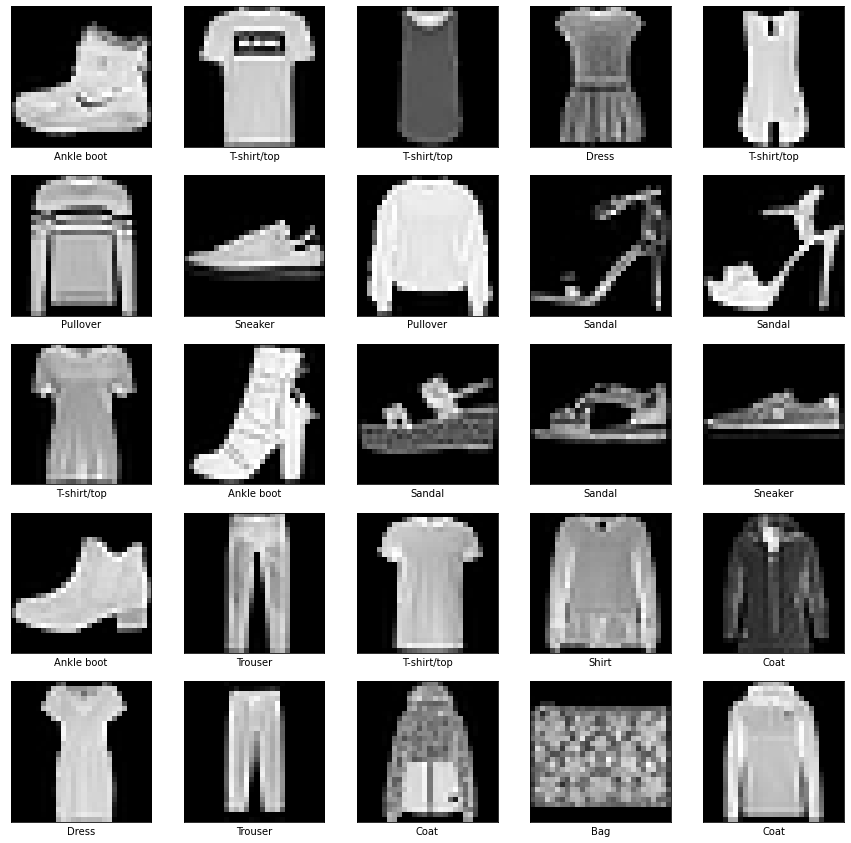

In [ ]:
new_shape = (x_train.shape[0], x_train.shape[1], x_train.shape[2])
plot_examples(x_train.reshape(new_shape), y_train, cmap='gray', labels=labels)

In [ ]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, kernel_size=(3,3), strides=2, activation='relu')(i)
x = Conv2D(64, kernel_size=(3,3), strides=2, activation='relu')(x)
x = Conv2D(128, kernel_size=(3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = tf.keras.models.Model(i,x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5236 - accuracy: 0.8048 - val_loss: 0.3926 - val_accuracy: 0.8572
Epoch 2/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3636 - accuracy: 0.8632 - val_loss: 0.3507 - val_accuracy: 0.8712
Epoch 3/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3129 - accuracy: 0.8819 - val_loss: 0.3236 - val_accuracy: 0.8792
Epoch 4/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2814 - accuracy: 0.8939 - val_loss: 0.3098 - val_accuracy: 0.8864
Epoch 5/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2559 - accuracy: 0.9046 - val_loss: 0.2906 - val_accuracy: 0.8950
Epoch 6/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2347 - accuracy: 0.9104 - val_loss: 0.3001 - val_accuracy: 0.8887
Epoch 7/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2150 - accuracy: 0.9177 - val_loss: 0.2852 -

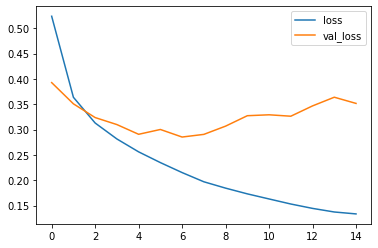

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

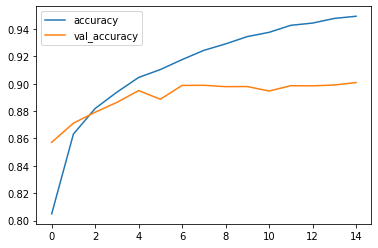

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[848   3  29  15   2   1  96   0   6   0]
 [  4 972   2  15   3   0   4   0   0   0]
 [ 13   0 872  12  37   0  65   0   1   0]
 [ 17   1  16 910  25   0  31   0   0   0]
 [  0   0  76  33 793   0  97   0   1   0]
 [  0   0   0   2   0 974   0  16   0   8]
 [ 99   2  62  21  60   0 746   0  10   0]
 [  0   0   0   0   0  22   0 964   0  14]
 [  3   0   5   5   4   3   6   3 971   0]
 [  1   0   0   0   0   4   0  36   0 959]]


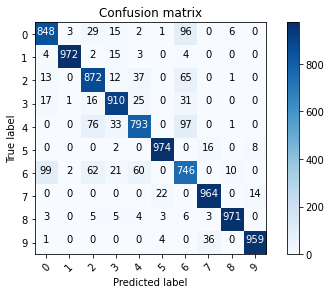

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

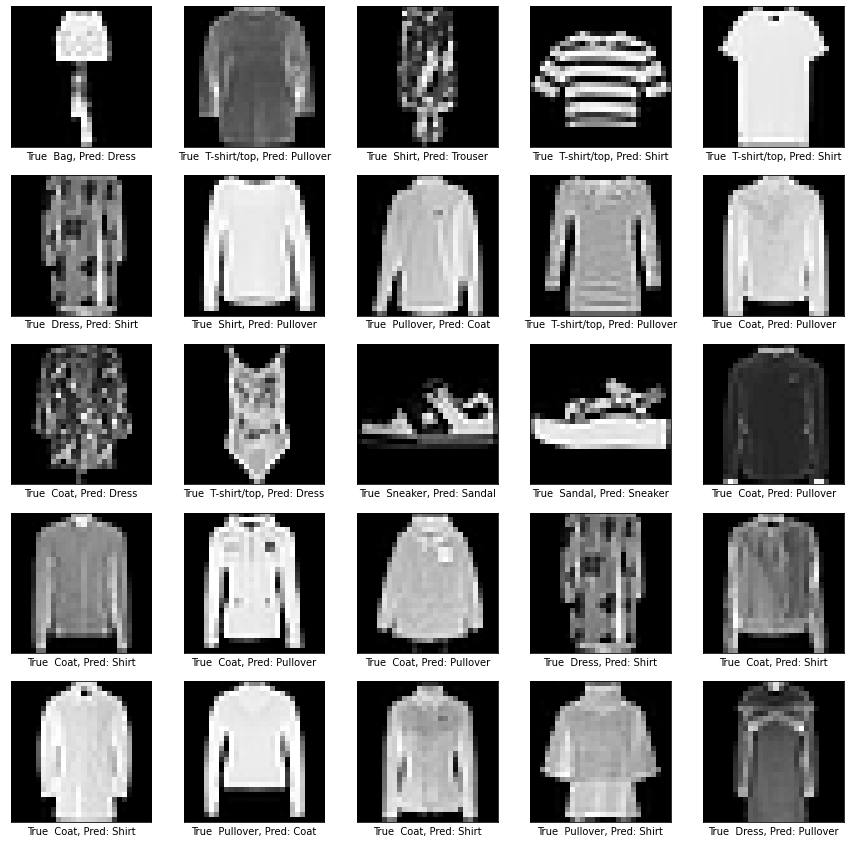

TypeError: ignored

In [ ]:
new_shape = (x_test.shape[0], x_test.shape[1], x_test.shape[2])
plot_misclasified_examples(x_test.reshape(new_shape), y_test, p_test, print_misclassified=True, labels=labels)